## Week 2: PANDAS

_updated 2025-01-10_

In this script, we will look at some penguins.  You can reaad up on this dataset at https://allisonhorst.github.io/palmerpenguins/.  We will be using a Python formatted version of this, read up on it here: https://pypi.org/project/palmerpenguins/, or just search for it:

##### Markdown

This cell is formatted as "Markdown" - this allows me to use markdown to write lovely equations such as:

$$x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

if $ax^2 +bx+c = 0$.


##### Why Jupyter?

We can alternate code cells vs. markdown cells, allowing for an easy display. Also, you can see the input and output, without me having to run the code

In [ ]:
## code blocks should have comments.

print(5+7)

x=623

x+5

### Markdown block

text goes here

_italics-

* points

math: $x^2-3$


In [6]:
##in our first cell, we import any libraries/ modules / packages we will need

## pandas is the dplyr of python, it lets us deal with dataframes
import pandas


## we're going to use two graphic packages
import matplotlib.pyplot as plt
import seaborn as sns

## and mkae sure our plots look good: % is pronounced "magic" which is fun
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [7]:
## Today we will look at a built in dataset, called Palmer's Penguins.
## We could install the penguins library, but it is easiest to use a library that exists already
## We would install with:
## `! pip install palmerpenguins`

penguins = sns.load_dataset("penguins")


### Describing the data: EDA

We should always begin by looking at the data:

In [11]:
## What have we got here?
# How many rows?  How many columns?

len(penguins)

penguins.shape[0]


## just rows: 
#print("there are ",[CODE], " rows")



344

In [12]:
## What are the columns like?


penguins.describe(include = "all").round(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.00,342.00,342.00,342.00,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.92,17.15,200.92,4201.75,NaN
std,NaN,NaN,5.46,1.97,14.06,801.95,NaN
min,NaN,NaN,32.10,13.10,172.00,2700.00,NaN
25%,NaN,NaN,39.22,15.60,190.00,3550.00,NaN
50%,NaN,NaN,44.45,17.30,197.00,4050.00,NaN
75%,NaN,NaN,48.50,18.70,213.00,4750.00,NaN


In [13]:
## let's see just the first few rows:

## R head(penguins)

penguins.head(7)

penguins.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


### Are there issues with the data?

Find the number of missing Values or NaN in each column:


In [ ]:
## How many NA values do we have?


In [ ]:
## Which rows are null for a single column?




In [ ]:
## Or  any of the columns:



In [ ]:
## We could also cut the NA rows

penguins_no_na=penguins.dropna()

#penguins_no_na

### Answering Questions about the Data

Find the Number of penguins who:
* are from Dream Island
* have a bill length of more than 40 mm
* Are from Dream Island and have a bill length of more than 40 mm

In [14]:
## or filter:
## be really careful about those quotes!
num_dream = penguins.query("island == 'Dream'").shape[0]
print("the number of penguins on Dream island is:", num_dream)



the number of penguins on Dream island is: 124


In [15]:
## Try it!  bill length of more than 40 mm

num_long_bill = penguins.query("bill_length_mm > 40").shape[0]
print("Number of penguins with bill length > 40 mm:", num_long_bill)

Number of penguins with bill length > 40 mm: 242


In [ ]:
## both?

num_both = penguins.query("island == 'Dream' and bill_length_mm > 40").shape[0]
print("Number of penguins from Dream Island with bill length > 40 mm:", num_both)


In [16]:
## Either?
num_both = penguins.query("island == 'Dream' or bill_length_mm > 40").shape[0]
print("Number of penguins from Dream Island with bill length > 40 mm:", num_both)


Number of penguins from Dream Island with bill length > 40 mm: 281


Can we do the same thing with a group?

In [ ]:
## for this we can query (like a filter) or Group.  Let's group:
print("Breakdown by Island: ")


## try filtering first:

print("")
print("Breakdown by island, but only those with bill length of more than 40 mm:")

## ?



##  Let's do some summarizing!

* Smallest Bill Length:
* Biggest Bill Length:
* What about of Adelie penguins on Dream Island?
* How about Chinstrap penguins on Dream Island?


In [ ]:
## lets do some summarizing:



In [ ]:
## 
#penguins.groupby("island").agg({"bill_length_mm":['min', 'median','mean', 'max','count' ]}).round(2)

In [ ]:
## Or by island and species:
#penguins.groupby(["island","species"]).agg({"bill_length_mm":['min', 'median','mean', 'max','count' ]}).round(2)

In [21]:
## or just answer the questions:
penguins["bill_length_mm"].min()

penguins["bill_length_mm"].max()

penguins.query("species == 'Adelie' and island == 'Dream'")["bill_length_mm"].agg(["min", "median", "mean", "max", "count"])

penguins.query("species == 'Chinstrap' and island == 'Dream'")["bill_length_mm"].agg(["min", "median", "mean", "max", "count"])



min       40.900000
median    49.550000
mean      48.833824
max       58.000000
count     68.000000
Name: bill_length_mm, dtype: float64

## Visualizing

We start with matplotlib - the basic one.  They all work this way

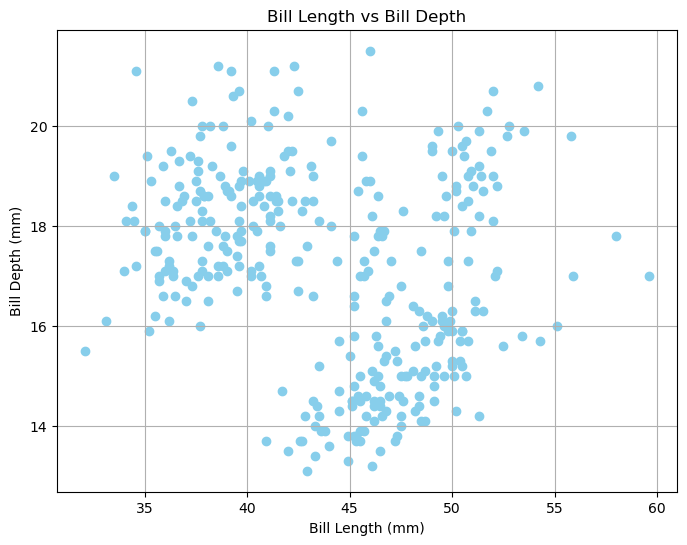

In [22]:
# Basic scatter plot

## declare that you are making a plot
plt.figure(figsize=(8, 6))

## What kind of plot?  What are the x and y acces?
plt.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"], color='skyblue')

## titles and appearance 
plt.title("Bill Length vs Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.grid(True)

## have is show up
plt.show()

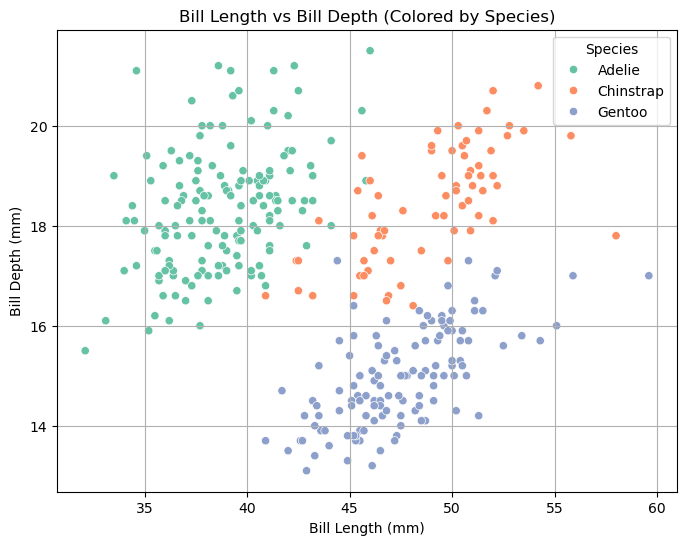

In [23]:
## or we can colour by species:  This is a different

# Create a scatter plot with species colored points
plt.figure(figsize=(8, 6))

##this uses seaborn instead of just matplotlib:
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=penguins, palette="Set2")
plt.title("Bill Length vs Bill Depth (Colored by Species)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.grid(True)
plt.legend(title="Species")
plt.show()

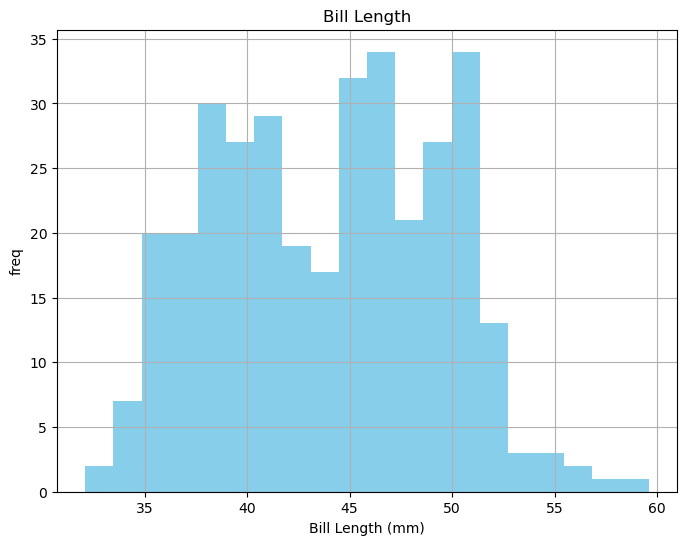

In [24]:
# Basic histogram


## declare that you are making a plot
plt.figure(figsize=(8, 6))

## What kind of plot?  What are the x and y acces?
plt.hist(penguins["bill_length_mm"], bins =20, color='skyblue')

## titles and appearance 
plt.title("Bill Length")
plt.xlabel("Bill Length (mm)")
plt.ylabel("freq")
plt.grid(True)

## have is show up
plt.show()


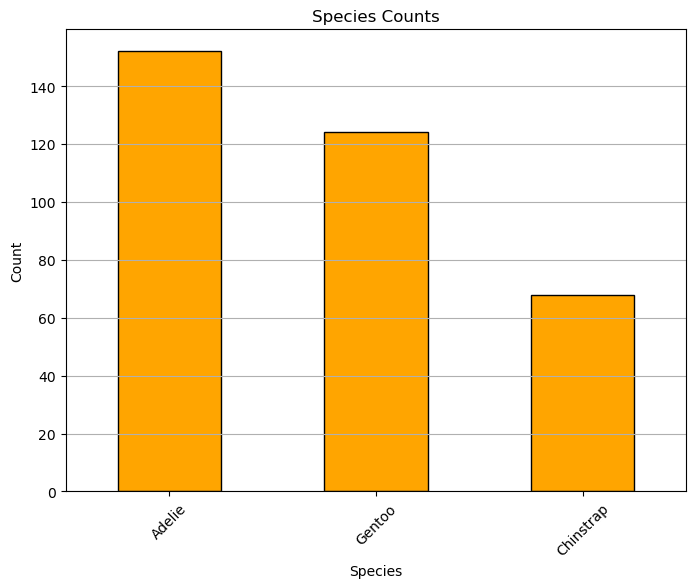

In [25]:
# Basic bar plot
species_counts = penguins["species"].value_counts()
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color='orange', edgecolor = "black")
plt.title("Species Counts")
plt.xlabel("Species")
plt.ylabel("Count")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### Seaborn

When plots need to get fancy, we start using other libraries.  My personal favourite is below.

<Figure size 1000x600 with 0 Axes>

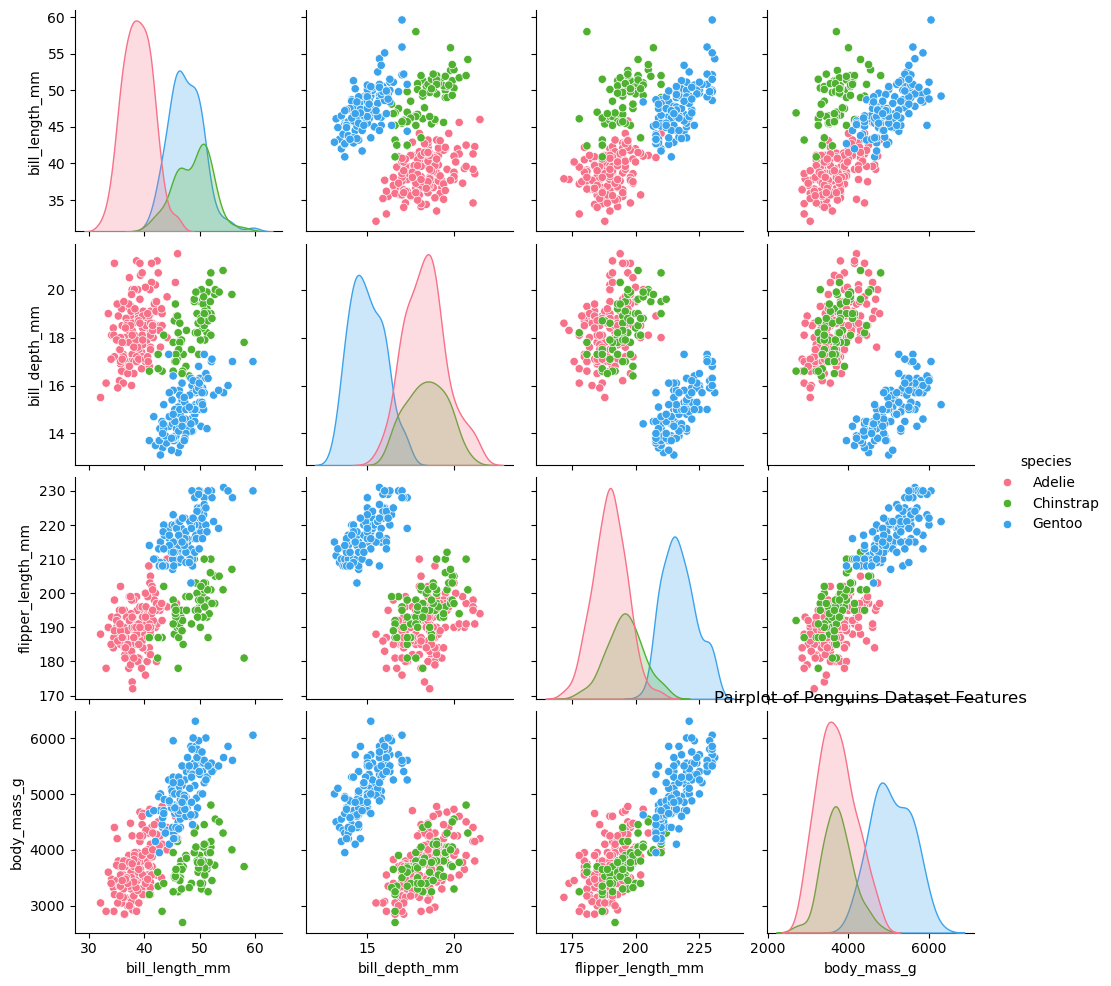

In [26]:
## let's get fancy:
## plt is basic, sns is our advanced:

# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.pairplot(penguins, hue='species', palette='husl')
plt.title('Pairplot of Penguins Dataset Features')
plt.show()

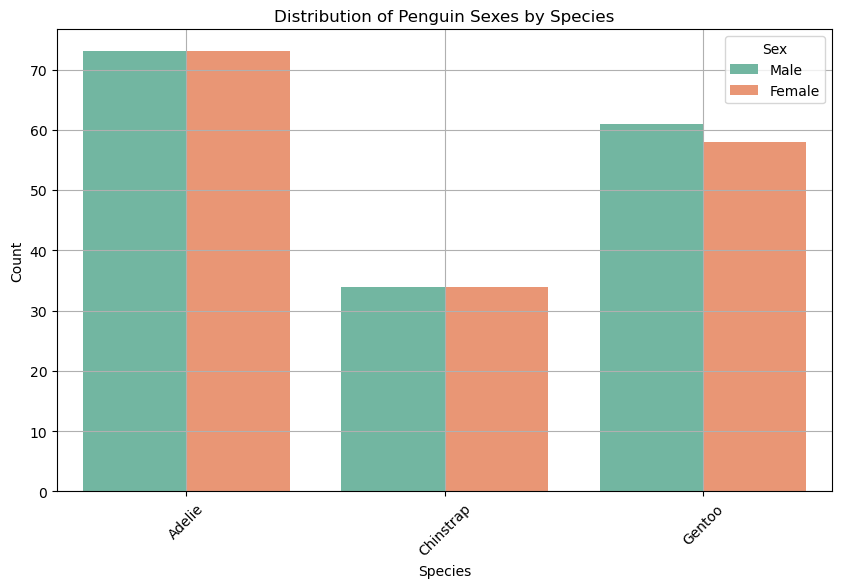

In [27]:
# Create a count plot for penguin sexes, 
plt.figure(figsize=(10, 6))

## un italicize this:
sns.countplot(x="species", hue="sex", data=penguins, palette="Set2")

plt.title("Distribution of Penguin Sexes by Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

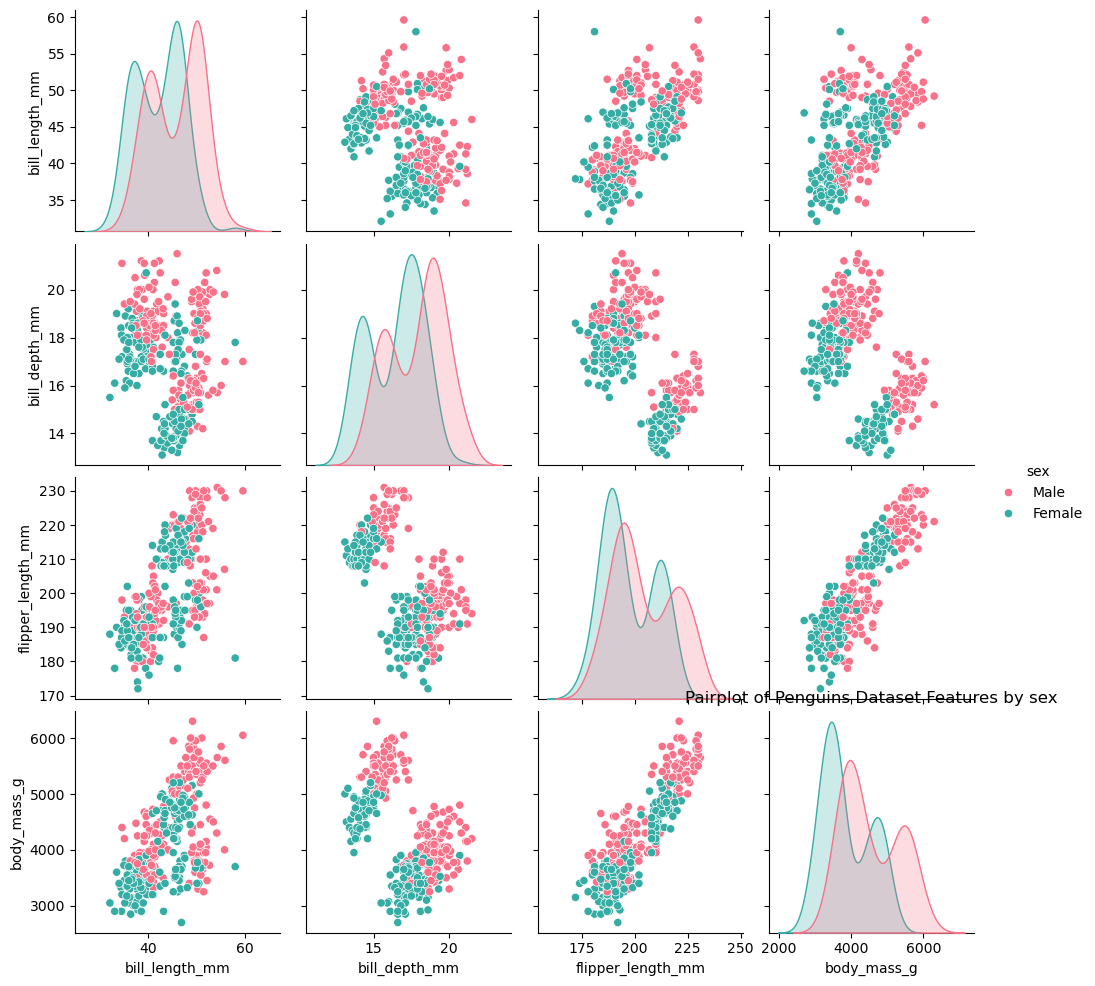

In [28]:
## or fancy again:
# Visualize the dataset by sex?

# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.pairplot(penguins, hue='sex', palette='husl')
plt.title('Pairplot of Penguins Dataset Features by sex')
plt.show()

## Wrangling:  reshaping the data

Sometimes we want a data set that looks different than what we started with.

This code will reshape the penguin dataset using pandas.melt(), where the columns "species", "island", and "sex" are kept as identifier variables, and all other columns are melted into two columns: "measurement" (containing the original column names) and "value" (containing the corresponding values). This reshaped dataset may be more suitable for certain types of analysis or visualization tasks.


In [ ]:
# Melt!



### Pivot

Everyone knows the best part of Excel is the PivotTable.  Well, here we don't even need Excel!  And we can use the median, which isn't available in Excel PivotTables.

In [ ]:
#pivot_penguins = pandas.pivot_table(penguins, index=["species", "island", "sex"], 
#                                values=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
#                                aggfunc='median')

In [ ]:
## show this rounded to 2 decimal places...
#pivot_penguins.round(2)

## Merging two datasets together
 
In R, this is a join, but in pandas we use `.merge()`, and use the options to specify how it wil merge.

In [ ]:
## What do penguins like?

# Create a new DataFrame with hypothetical penguin data
likes = pandas.DataFrame({
    "species": ["Emperor", "Gentoo", "Chinstrap", "Adelie", "Pingu"],
    "preferred_food": ["Fish", "Krill", "Squid", "Fish", "Krill"],
    "average_diving_depth (m)": [200, 100, 150, 50, 180],
    "preferred_nesting_material": ["Pebbles", "Grass", "Sand", "Rocks", "Ice"]
})


In [ ]:
likes

In [ ]:
## We don't have time to look at all of the merges and joins today, but here's a basic left join:

## what happens when you change "left" to "right"?  "inner"?  "outer"?

new_penguins = pandas.merge(penguins, likes, how = "right", on ="species")

new_penguins

## look forward to more joins in a future week.

## Creating new colums

Let's 
* Rename a column
* Create some new columns
* lambda functions
* dropping columns



In [ ]:
## renaming a column:  Can you take the mm out?



In [ ]:
## or creating a new one:


In [ ]:
## or with a lambda

## penguins.assign(bill_length_cm = lambda x: x.bill_length_mm/10)

In [ ]:
## or just assign

## penguins.assign(bill_ratio = penguins["bill_length_mm"]/penguins["bill_depth_mm"])

In [ ]:
## note that we haven't changed penguins!
penguins

In [ ]:
## Dropping: drop bill length and depth



## Chaining:

It's the pipe of the python world!  It's not as useful, as the Object Oriented nature makes things just easier - you can write:

```
penguins.query("bill_length_mm > 40").groupby(by = "island").size()
```

which is the same as the R code:

```
penguins %>%
  filter(bill_length_mm > 40)%>%
  group_by(island) %>% 
  summarize(n())
```

If we do want this in multiple lines, we can chain, by adding in brackets:

```
(penguins.query("bill_length_mm > 40")
    .groupby(by = "island")
    .size())
```